
### PROJECT MODULE 2 (Data visualization)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf
import plotly.express as px
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
##to hide the code 



HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [3]:
cf.go_offline()

In [4]:
diamonds_df = pd.read_csv('./data/diamonds_train.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


### Descriptive statistics from our dataset



In [5]:
#Dataset size
diamonds_df.shape

(40455, 10)

In [6]:
#Data types
diamonds_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
#Null values on the dataset

diamonds_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
#getting sumary statistics

#cathegorical values

diamonds_df.describe(include='object')


,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16220,8455,9749


In [9]:
#numerical values

diamonds_df.describe(include=['float64','int64'])

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [10]:
diamonds_df.max()

carat            4.5
cut        Very Good
color              J
clarity         VVS2
depth             79
table             95
price          18823
x              10.23
y               58.9
z               8.06
dtype: object

In [11]:
diamonds_df.min()

carat       0.2
cut        Fair
color         D
clarity      I1
depth        43
table        43
price       326
x             0
y             0
z             0
dtype: object

In [12]:
diamonds_df.mean()

carat       0.797706
depth      61.752841
table      57.446133
price    3928.444469
x           5.729392
y           5.732819
z           3.537154
dtype: float64

In [13]:
diamonds_df.std()

carat       0.475544
depth       1.431725
table       2.233535
price    3992.416147
x           1.124453
y           1.146650
z           0.697062
dtype: float64

In [14]:
diamonds_df.median()

carat       0.70
depth      61.80
table      57.00
price    2397.00
x           5.69
y           5.71
z           3.52
dtype: float64

In [15]:
diamonds_df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,61.9,56.0,605,4.37,4.37,2.69


In [16]:
diamonds_df[['z','y','x']]>=0

,z,y,x
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
40450,True,True,True
40451,True,True,True
40452,True,True,True
40453,True,True,True


In [17]:
diamonds_df['carat'].value_counts()

0.30    1973
1.01    1739
0.31    1717
0.70    1447
0.32    1395
        ... 
3.22       1
4.13       1
2.71       1
2.77       1
3.40       1
Name: carat, Length: 270, dtype: int64

In [18]:
value_per_carat = diamonds_df['price']/ diamonds_df['carat']
value_per_carat

0        3527.272727
1        1578.125000
2        3783.098592
3        1800.000000
4        4786.274510
            ...     
40450    7514.925373
40451    6245.049505
40452    5402.970297
40453    1381.818182
40454    5025.806452
Length: 40455, dtype: float64

In [19]:
diamonds_df['clarity'].value_counts()

SI1     9749
VS2     9248
SI2     6929
VS1     6066
VVS2    3799
VVS1    2774
IF      1327
I1       563
Name: clarity, dtype: int64

In [20]:
#mean price per clarity

value_per_clarity = diamonds_df['price'].sum()/ diamonds_df['clarity'].value_counts()
value_per_clarity

SI1      16301.694635
VS2      17184.820610
SI2      22936.242026
VS1      26199.344049
VVS2     41833.435378
VVS1     57290.995314
IF      119762.788998
I1      282282.808171
Name: clarity, dtype: float64

In [21]:
diamonds_df[['x','y','z']]


#z value is always smaller than x and y

,x,y,z
0,6.83,6.79,4.25
1,4.35,4.38,2.75
2,5.62,5.53,3.65
3,4.68,4.72,3.00
4,6.55,6.51,3.95
...,...,...,...
40450,7.10,7.04,4.43
40451,8.31,8.25,4.73
40452,6.37,6.42,4.01
40453,4.45,4.47,2.76


In [22]:
diamonds_df['color'].value_counts().sort_values(ascending=False)

G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: color, dtype: int64

In [23]:
diamonds_df['cut'].value_counts()

Ideal        16220
Premium      10260
Very Good     9095
Good          3663
Fair          1217
Name: cut, dtype: int64

In [24]:
print('cut on df:', diamonds_df['cut'].unique())
print('color on df:', diamonds_df['color'].unique())

cut on df: ['Premium' 'Very Good' 'Fair' 'Good' 'Ideal']
color on df: ['J' 'H' 'G' 'D' 'F' 'E' 'I']


In [25]:
print('max price on this dataset;', diamonds_df.price.max())
print('min price on this dataset;', diamonds_df.price.min())
print('avg price on this dataset;', diamonds_df.price.mean())
print('std on price this dataset;', diamonds_df.price.std())
print('median price this dataset;', diamonds_df.price.median())

max price on this dataset; 18823
min price on this dataset; 326
avg price on this dataset; 3928.444469163268
std on price this dataset; 3992.4161466170863
median price this dataset; 2397.0


Average values...

In [26]:
cut_and_clarity = diamonds_df.pivot_table(index=['cut'],columns=['clarity'])
cut_and_clarity

carat                                                    \
clarity          I1        IF       SI1       SI2       VS1       VS2   
cut                                                                     
Fair       1.377593  0.447143  0.946699  1.205169  0.877541  0.893368   
Good       1.184366  0.617843  0.821465  1.035074  0.741545  0.852205   
Ideal      1.225841  0.450264  0.802443  1.007588  0.671590  0.663573   
Premium    1.336513  0.607391  0.912885  1.156065  0.789137  0.836300   
Very Good  1.272923  0.610955  0.849522  1.065591  0.728338  0.816109   

                                   depth             ...         y            \
clarity        VVS1      VVS2         I1         IF  ...      VVS1      VVS2   
cut                                                  ...                       
Fair       0.662500  0.701154  65.720988  59.414286  ...  5.515000  5.478846   
Good       0.500073  0.616157  62.266197  61.564706  ...  4.937299  5.261852   
Ideal      0.498702  0.584880  61.627434  61.637954  ...  4.986990  5.229305   
Premium    0.542172  0.642570  61.277632  61.039130  ...  5.051376  5.335108   
Very Good  0.498668  0.559159  61.743077  61.375879  ...  4.941957  5.099084   

                  z                                                    \
clarity          I1        IF       SI1       SI2       VS1       VS2   
cut                                                                     
Fair       4.411605  2.952857  3.872404  4.220927  3.701475  3.785368   
Good       4.026479  3.261373  3.626435  3.891453  3.476555  3.659164   
Ideal      4.149646  2.973058  3.568961  3.864224  3.360668  3.343308   
Premium    4.202039  3.197143  3.696205  4.013342  3.502754  3.568765   
Very Good  4.181538  3.247839  3.648256  3.948923  3.442374  3.583219   

                               
clarity        VVS1      VVS2  
cut                            
Fair       3.303750  3.464038  
Good       3.053066  3.270787  
Ideal      3.069199  3.219264  
Premium    3.100430  3.275805  
Very Good  3.041382  3.132306  

[5 rows x 56 columns]

In [27]:
diamonds_df[['cut','carat','x','y','z']]
cut_price = diamonds_df[['cut','price']]
diamonds_df
cut_price

,cut,price
0,Premium,4268
1,Very Good,505
2,Fair,2686
3,Good,738
4,Ideal,4882
...,...,...
40450,Ideal,10070
40451,Good,12615
40452,Ideal,5457
40453,Ideal,456


In [28]:
price_by_color = diamonds_df.groupby('color', as_index=False).agg('mean')
price_by_color

,color,carat,depth,table,price,x,y,z
0,D,0.653036,61.721886,57.344959,3134.943157,5.404704,5.409541,3.336782
1,E,0.658835,61.659836,57.494567,3088.342526,5.413894,5.418651,3.338709
2,F,0.731503,61.689954,57.409726,3677.355720,5.601393,5.607254,3.455930
3,G,0.774382,61.752785,57.287889,4023.214902,5.684102,5.687183,3.508856
4,H,0.910355,61.827481,57.533503,4476.469014,5.981431,5.984082,3.693629
5,I,1.026791,61.873214,57.562574,5090.868800,6.216099,6.215675,3.842078
6,J,1.166500,61.909626,57.790701,5346.234112,6.527285,6.525570,4.039879


In [30]:
clarity_price = diamonds_df.groupby('clarity', as_index=False).agg('mean')
clarity_price

,clarity,carat,depth,table,price,x,y,z
0,I1,1.299591,62.804796,58.237478,3971.206039,6.782771,6.729485,4.227318
1,IF,0.499849,61.511454,56.496684,2797.897513,4.953451,4.975011,3.052427
2,SI1,0.851174,61.859668,57.648549,3999.856908,5.888604,5.888270,3.639990
3,SI2,1.081472,61.779954,57.909150,5101.044307,6.408255,6.407433,3.952679
4,VS1,0.721553,61.678948,57.285410,3796.813551,5.555437,5.562798,3.428205
5,VS2,0.762661,61.721345,57.404520,3913.590182,5.655557,5.656696,3.489658
6,VVS1,0.506994,61.606921,56.929740,2559.498558,4.973554,4.988504,3.068893
7,VVS2,0.591777,61.658884,57.031561,3240.978942,5.206976,5.220753,3.213917


In [31]:
cut_price = diamonds_df.groupby('cut', as_index=False).agg('mean')
cut_price

,cut,carat,depth,table,price,x,y,z
0,Fair,1.047305,64.051438,59.022104,4333.271980,6.248825,6.184289,3.985193
1,Good,0.844565,62.407699,58.652307,3880.611794,5.824797,5.836140,3.632361
2,Ideal,0.700337,61.703206,55.952990,3436.112577,5.500933,5.512639,3.396982
3,Premium,0.896125,61.261082,58.737076,4617.322612,5.982015,5.954603,3.651374
4,Very Good,0.808056,61.824794,57.956031,3994.444420,5.743912,5.773269,3.559988


### First visualization plots

First a correlation matrix...

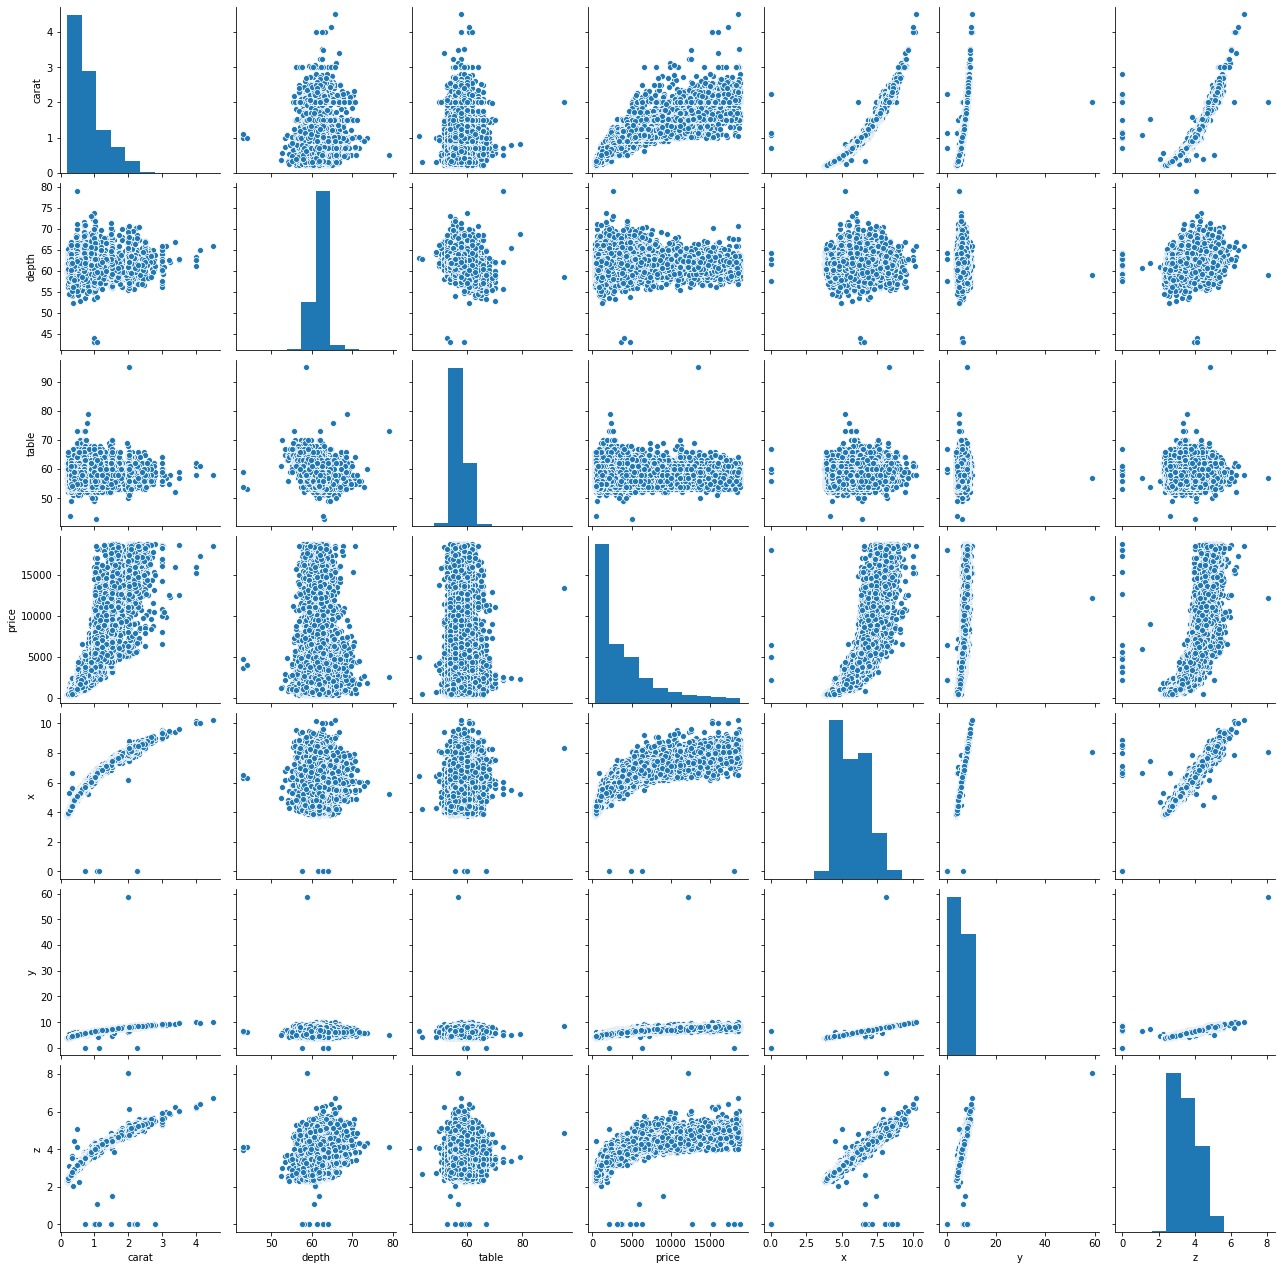

In [32]:
sns.pairplot(diamonds_df)

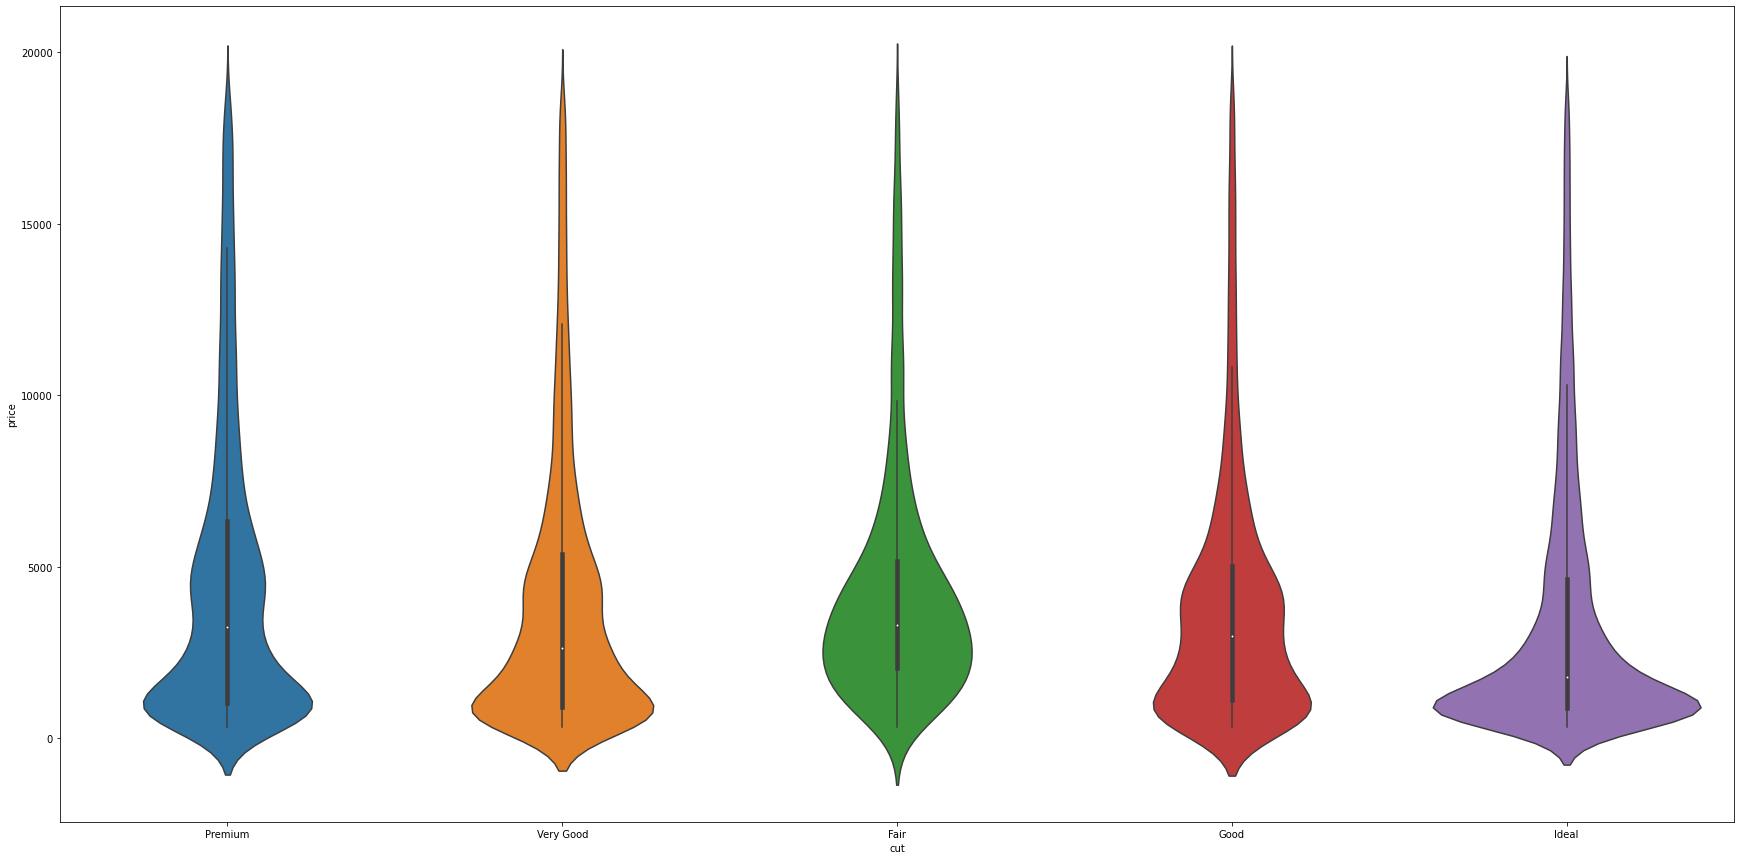

In [33]:
fig = plt.figure(figsize=(30,15))
ax = sns.violinplot(x='cut', y='price', data=diamonds_df)

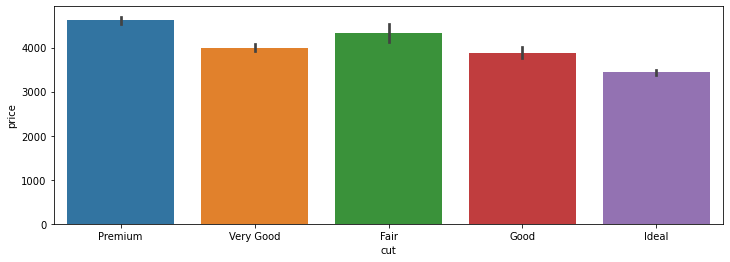

In [34]:
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(x='cut',y='price',data=diamonds_df)

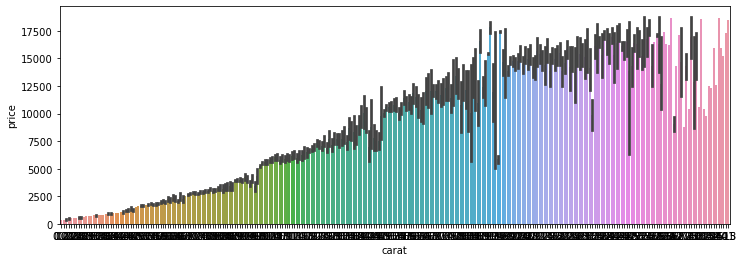

In [35]:
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(x='carat',y='price',data=diamonds_df)

Distributions...

Text(0.5, 1.0, 'Distribution of carat weight')

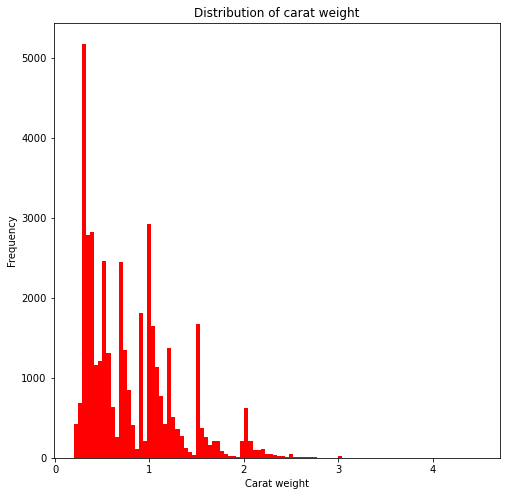

In [36]:
plt.figure(figsize=(8,8))

#carats:

plt.subplot()
plt.hist(diamonds_df['carat'],bins=100,color='red')
plt.xlabel('Carat weight')
plt.ylabel('Frequency')
plt.title('Distribution of carat weight')

Text(0.5, 1.0, 'Distribution diamond depth')

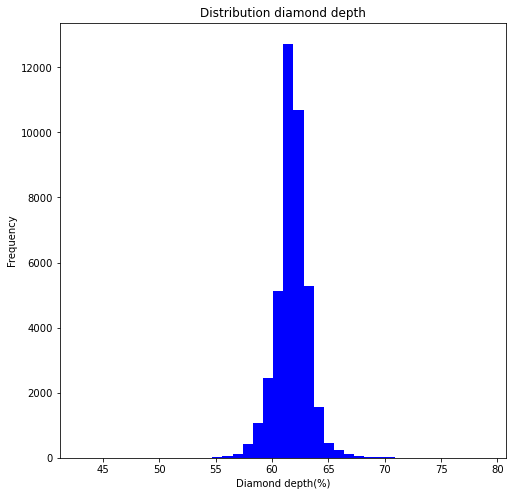

In [37]:
plt.figure(figsize=(8,8))

#depth

plt.subplot()
plt.hist(diamonds_df['depth'],bins=40,color='blue')
plt.xlabel('Diamond depth(%)')
plt.ylabel('Frequency')
plt.title('Distribution diamond depth')

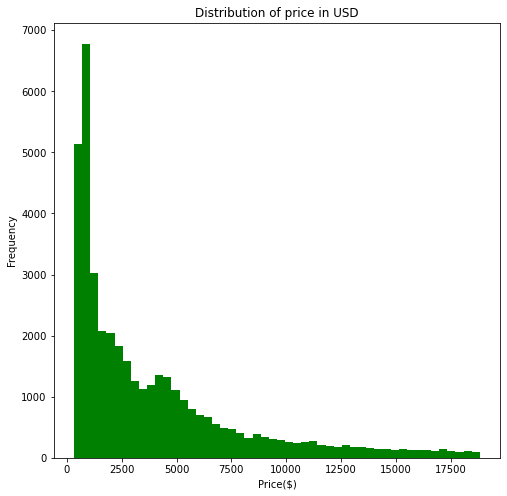

In [38]:
plt.figure(figsize=(8,8))

#price


ax3 = plt.subplot()
plt.hist(diamonds_df['price'],bins=50,color='green')
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.title('Distribution of price in USD')
plt.show()



### Correlation heatmaps...

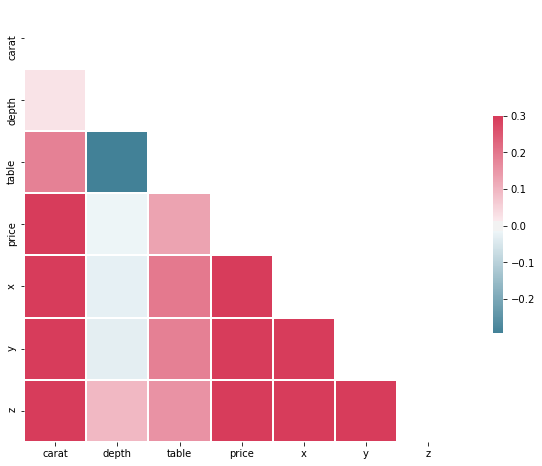

In [43]:
#sns.palplot(sns.color_palette("RdBu", n_colors=7))
#computing correlation
corr = diamonds_df.corr()

#creating a mask

mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask[np.triu_indices_from(mask)] = True

#setting the matplot figure

fig, ax = plt.subplots(figsize=(12,8))

#creating a diverging colormap

cmap = sns.diverging_palette(223,5,as_cmap=True)

#Drawing the heatmap with the  mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=1, cbar_kws={'shrink':.5})

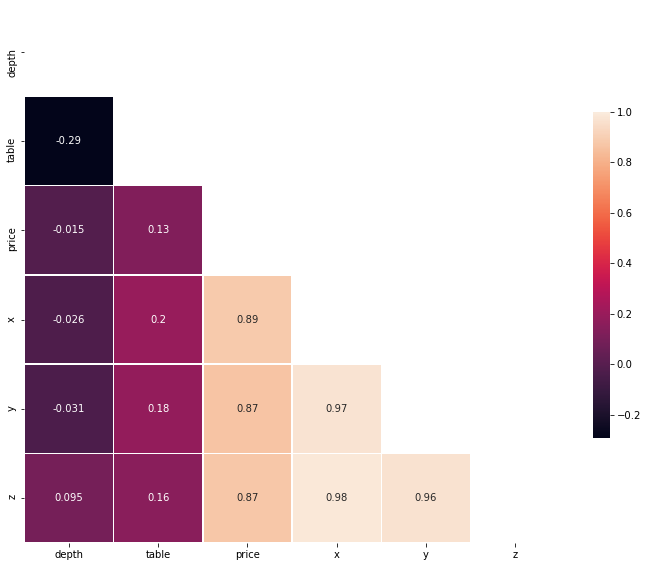

In [11]:
#select the correlation

corr = diamonds_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(12, 12))


#Drawing the heatmap with the  mask and correct aspect ratio


sns.heatmap(corr, mask=mask, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = diamonds_df['x']
y = diamonds_df['y']
z = diamonds_df['z']
x,y,z = np.meshgrid(x,y)
r = np.sqrt(x**2 + y**2 + z**2)
w = np.sin(r)


#plotting surface
surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                      linewidth=0,antialiased=False)
#customize the z axis
ax.set_zlim(-1.01,1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatsStrFormatter('%.02f'))

#add a color bar wich maps values to colors
fig.colorbar(surf, shrink=0.5,aspect=5)

plt.show



#I tried to do a 3d plot but it killed my kernel so I just let me code here
#bc it wouldnt show

### Classifying by color

### Interactive graphs

Color by price...

In [47]:
#graph with the avg price on each color

px.bar(data_frame=price_by_color,x='color',y='price',color='color',title='Av. price by color')


In [48]:
px.bar(data_frame=clarity_price,x='clarity',y='price',color='clarity',title='Av. price by clarity')


In [49]:
px.scatter(data_frame=cut_price,x='cut',y='price',color='cut',title='Av. price by cut')


In [ ]:


px.scatter(data_frame=diamonds_df,x='carat',y='price',color='carat',title='Price by carat weight')

In [50]:
## avg caract by volume and percentage of them in our dataframe


fig = px.pie(diamonds_df,
             values='carat',
             names='clarity',
             title='% of each diomond based on clarity and carats')
fig.show()